# Simplifiying the Identification of Code Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [2]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [3]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [4]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/scalar.label2.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/vector.label2.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/PSrad.label2.csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa.label2.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.label2.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDFTest = clubbDF
clubbDF = drop_columns(clubbDF,arr)

In [5]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [7]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [8]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [9]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [10]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [11]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

## Create Test Set

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [13]:
test_set.head()

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
949,0.028966,0.036510,0.000335,0.016255,0.028692,0.012710,0.007542,0.247923,0.070003,0.018424,...,0.006376,0.549109,0.0,0.170446,0.052079,0.000026,0.000076,0.930827,0.546198,1.0
369,0.061183,0.061195,0.000000,0.035588,0.059904,0.025597,0.000000,0.567718,0.014878,0.000000,...,0.000000,0.382106,0.0,0.131916,0.000000,0.000000,0.000000,0.569980,0.310028,0.0
654,0.057224,0.067766,0.000157,0.020206,0.057177,0.037021,0.010545,0.240337,0.130431,0.000162,...,0.001560,0.446779,0.0,0.107410,0.002884,0.000040,0.000003,0.836692,0.563632,1.0
884,0.028393,0.035773,0.000313,0.016018,0.027957,0.012375,0.007378,0.244307,0.069302,0.018313,...,0.006289,0.516829,0.0,0.171630,0.052827,0.000034,0.000078,0.916432,0.539805,1.0
773,0.053858,0.101274,0.000308,0.014396,0.050709,0.039437,0.047438,0.401446,0.068913,0.000163,...,0.006475,0.315747,0.0,0.121373,0.004819,0.000786,0.000004,0.914490,0.587025,0.0


## Prepare Data for ML

In [14]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()
test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

## Feature Scaling

In [ ]:
# Making all the features in same scale. Creating a pipeline to handle this. But most of our data is in same scale I am not using it. 
# it is for future purpose only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [ ]:
train_Features = full_pipeline.fit_transform(train_Features)
test_Features = full_pipeline.fit_transform(test_Features)

In [ ]:
# from sklearn.metrics import mean_squared_error

# label_predictions = forest_reg.predict(train_Features_prepared)
# forest_mse = mean_squared_error(train_Labels, label_predictions)
# forest_rmse = np.sqrt(forest_mse)
# forest_rmse

In [16]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [ ]:
# from sklearn.model_selection import cross_val_score

# forest_scores = cross_val_score(forest_reg, train_Features_prepared, train_Labels,
#                                 scoring= "neg_mean_squared_error", cv=10)
# forest_rmse_scores = np.sqrt(-forest_scores)

# display_scores(forest_rmse_scores)

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_features": [2,4,6,8],
              "n_estimators" : [1,3,10,20,50,70,100,150,200]
              }
# param_grid = {"max_depth": [3, None],
#               "max_features": [2,4,6,8],
#               "bootstrap": [True, False],
#               "n_estimators" : [1,3,10,20,50,100,200]
#               }

forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg,param_grid,cv =5, scoring = 'neg_mean_squared_error')

grid_search.fit(train_Features,train_Labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4, 6, 8], 'n_estimators': [1, 3, 10, 20, 50, 70, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

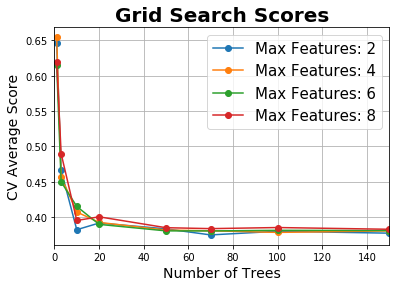

In [20]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score'] *(-1)
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score'] *(-1)
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel('CV Average Score', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    ax.set_xlim(0,150)
    plt.savefig("ResultRFForNewLabels.jpg")

# Calling Method 
plot_grid_search(grid_search.cv_results_, [1,3,10,20,50,70,100,150,200], [2,4,6,8], 'Number of Trees', 'Max Features')


In [37]:
scores_mean = grid_search.cv_results_['mean_test_score'] *(-1)
scores_mean = np.array(scores_mean).reshape(4,9)

max_two = scores_mean[0]

max_four = scores_mean[1]
max_six = scores_mean[2]
max_eight = scores_mean[3]
grid = [1,2,3,4,5,6,7,8,9]

In [53]:
max_two[5],max_two[4] = max_two[4],max_two[5]


0.383424055066
0.37486635022


In [55]:
max_two[4] = 0.36486306

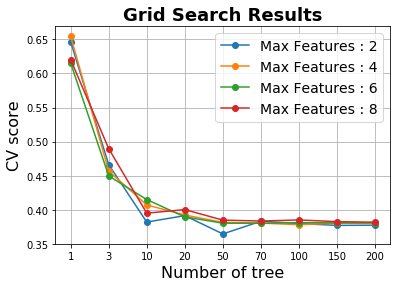

In [66]:
plt.plot(grid, max_two, '-o', label= 'Max Features : 2')
plt.plot(grid, max_four, '-o', label= 'Max Features : 4')
plt.plot(grid, max_six, '-o', label= 'Max Features : 6')
plt.plot(grid, max_eight, '-o', label= 'Max Features : 8')
plt.xticks(grid,[1,3,10,20,50,70,100,150,200])
plt.title('Grid Search Results',fontsize=18, fontweight='bold')
plt.legend(loc='best',fontsize=14)
plt.xlabel('Number of tree',fontsize=16)
plt.ylabel('CV score',fontsize=16)
plt.grid('on')
plt.savefig('result_Grid.jpg')
plt.show()

In [46]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 70}

In [ ]:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
sorted(zip(feature_importances, counterNameList),reverse =True) # Importance Score

In [ ]:
from sklearn.metrics import mean_squared_error
n_trees= [1,3,10,20,50,100,200,500]
test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

result= []
for idx in range(len(n_trees)):
    forest_reg = RandomForestRegressor(n_estimators=n_trees[idx],max_features = 4)
    
    forest_reg.fit(train_Features,train_Labels)
    final_prediction = forest_reg.predict(test_Features)

    final_mse = mean_squared_error(test_Labels, final_prediction)
    final_rmse = np.sqrt(final_mse)
    print n_trees[idx]
    print final_rmse
    result.append(final_rmse)

print result

In [ ]:
plt.plot(n_trees,result,'-o',ms=10, lw=2, alpha=0.7, mfc='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Root Mean Square Error")
plt.grid()
plt.title("RMSE Plot")
plt.savefig("ErrorPlot.jpg")

In [ ]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

#test_Features = test_set.drop("LABEL",axis=1)
#test_Labels = test_set["LABEL"].copy()


final_prediction = final_model.predict(test_Features)

final_mse = mean_squared_error(test_Labels, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

In [ ]:
final_prediction

In [ ]:
import numpy as np
final = np.where(final_prediction>=4.5,5,
                 np.where(((final_prediction<4.5) & (final_prediction>=3.5)) ,4,
                 np.where(((final_prediction<3.5) & (final_prediction>=2.5)) ,3,
                 np.where(((final_prediction<2.5) & (final_prediction>=1.6)),2,
                 np.where(((final_prediction<1.6) & (final_prediction>=0.8)), 1,0      
                         )))))

In [ ]:
from sklearn.metrics import confusion_matrix

cnfTest = confusion_matrix(test_Labels,final)
cnfTest

In [ ]:
from sklearn.metrics import precision_score

precision_score(test_Labels,final, average='weighted')  


In [ ]:
from sklearn.metrics import recall_score
recall_score(test_Labels,final,average='weighted')

In [ ]:
import seaborn as sns

ax= plt.axes()
svm = sns.heatmap(cnfTest,annot=True,fmt="d", linewidths=.5,ax=ax)
ax.set_title('Confusion Matrix',fontsize = 24)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
figure = svm.get_figure()  

figure.savefig('svm_conf_new_labels.jpg', dpi=400)

In [ ]:
clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()
train_Features = full_pipeline.fit_transform(clubb_Features)


clubb_prediction = final_model.predict(clubb_Features)

final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

In [ ]:
clubb_Labels.values

In [ ]:
clubb_prediction

In [ ]:
clb = np.where(clubb_prediction>=4.5,5,
                 np.where(((clubb_prediction<4.5) & (clubb_prediction>=3.5)) ,4,
                 np.where(((clubb_prediction<3.5) & (clubb_prediction>=2.5)) ,3,
                 np.where(((clubb_prediction<2.5) & (clubb_prediction>=1.6)),2,
                 np.where(((clubb_prediction<1.6) & (clubb_prediction>=0.8)), 1,0      
                         )))))

In [ ]:
from sklearn.metrics import confusion_matrix

cnfClubb = confusion_matrix(clubb_Labels,clb)
cnfClubb

In [ ]:
import seaborn as sns

ax= plt.axes()
svm = sns.heatmap(cnfClubb,annot=True,fmt="d", linewidths=.5,ax=ax)
ax.set_title('Random Forest Classifier',fontsize = 24)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
figure = svm.get_figure()  

figure.savefig('clubb_Cnf_Matrix.jpg', dpi=400)

In [ ]:
from sklearn.metrics import precision_score

precision_score(clubb_Labels,clb, average='macro')  


In [ ]:
from sklearn.metrics import recall_score
recall_score(clubb_Labels,clb,average='macro')

In [ ]:
def rearrangeTime(dataFrame,counterNameList):
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins = temp_df['time'].values
    return df_per_ins

In [ ]:
print len(clubb_prediction)
timslots = clubb_prediction.argsort()[-100:][::-1]

In [ ]:
timslots = timslots.tolist()

In [ ]:
counter = ['PAPI_BR_CN']
slots = rearrangeTime(clubbDFTest,counter)
timeVal = []
  
for i in timslots:
    timeVal.append(round(slots[i],3))

In [ ]:
tempVal = []
for i in timslots:
    tempVal.append(round(clubb_prediction[i],3))
tempVal

In [ ]:
priorityDict = {}

for i in range(len(timslots)):
    priorityDict[timeVal[i]] = tempVal[i]

In [ ]:
import sys
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import operator

# event type ranges
FOLDED_SAMPLING_CALLER_LINE = range(631000100, 631000200)

class ExtraeRowData(object):

    def __init__(self, path):
        # NOTE: not used for now
        pass

class ExtraePcfData(object):

    def __init__(self, path):

        self.events = {}

        BLANK, HEAD, VALUE = 0, 1, 2
        state = BLANK

        with open(path, 'r') as fh:

            eventtypes = []
            eventvalues = {}

            for line in fh:

                line = line.strip()
                if len(line) == 0:
                    state = BLANK
                    continue

                if state == BLANK:
                    if line == "EVENT_TYPE":
                        for eventtype in eventtypes:
                            eventtype['values'] = eventvalues
                        eventtypes = []
                        eventvalues = {}
                        state = HEAD
                elif state == HEAD:
                    if line == "VALUES":
                        state = VALUE
                    else:
                        items = line.split()
                        if len(items) > 2:
                            eventtype = {'desc': ' '.join(items[2:])}
                            eventtypes.append(eventtype)
                            self.events[int(items[1])] = eventtype
                elif state == VALUE:
                    items = line.split()
                    if len(items) > 2:
                        eventvalues[int(items[0])] = (items[1], ' '.join(items[2:]))
                    elif len(items) == 2:
                        eventvalues[int(items[0])] = ' '.join(items[1:])

            for eventtype in eventtypes:
                eventtype['values'] = eventvalues

class ExtraePrvData(object):

    def __init__(self, path):

        self.events = OrderedDict()

        with open(path, 'r') as fh:

            for line in fh:

                line = line.strip()

                if len(line) == 0:
                    continue

                if line[0] != "2":
                    continue

                items = line.split(":")

                timestamp = int(items[5])

                prvevent = OrderedDict()
                self.events[timestamp] = prvevent

                for etype, evalue in zip(items[6::2], items[7::2]):
                    prvevent[int(etype)] = int(evalue)

class ExtraeRawData(object):


    def __init__(self, path):

        self.row = None
        self.pcf = None
        self.prv = None

        # check path
        root, ext = os.path.splitext(path)
        if ext in (".prv", ".pcf", ".row"):
            path = root

        # read row
        rowpath = path + ".row"
        if os.path.isfile(rowpath):
            self.row = ExtraeRowData(rowpath)

        # read pcf
        pcfpath = path + ".pcf"
        if os.path.isfile(pcfpath):
            self.pcf = ExtraePcfData(pcfpath)
        # read prv
        prvpath = path + ".prv"
        if os.path.isfile(prvpath):
            self.prv = ExtraePrvData(prvpath)

    def get_prv_events(self, eventrange):
        for timestamp, events in self.prv.events.items():
            for eventtype, eventvalue in events.items():
                if eventtype in eventrange:
                    yield timestamp, eventtype, eventvalue

    def get_prv_events_by_timestamp(self, timestamp):
        return self.prv.events[timestamp]

    def get_pcf_events(self, eventrange):
        for eventype, (desc, values) in self.pcf.events.items():
            if eventype in eventrange:
                yield desc, values

    def get_pcf_event(self, eventtype):
        return self.pcf.events[eventtype]


    def get_folded_sampling_caller_lines(self):

        lineidcounts = {}
        callerlevels = {}
        timelineids = {}

        prev_timestamp = None
        deepest_callstack = None

        for timestamp, callerlevel, lineid in self.get_prv_events(FOLDED_SAMPLING_CALLER_LINE):

            if callerlevel not in callerlevels:
                callerlevels[callerlevel] = {}
            if lineid not in callerlevels[callerlevel]:
                callerlevels[callerlevel][lineid] = None

            if timestamp != prev_timestamp:
                if prev_timestamp is not None:
                    timelineids[prev_timestamp] = deepest_callstack[1]
                    if deepest_callstack[1] in lineidcounts:
                        lineidcounts[deepest_callstack[1]] += 1
                    else:
                        lineidcounts[deepest_callstack[1]] = 1
                deepest_callstack = (callerlevel, lineid)
            elif callerlevel < deepest_callstack[0]:
                deepest_callstack = (callerlevel, lineid)
            prev_timestamp = timestamp

        if prev_timestamp is not None:
            timelineids[prev_timestamp] = deepest_callstack[1]
            if deepest_callstack[1] in lineidcounts:
                lineidcounts[deepest_callstack[1]] += 1
            else:
                lineidcounts[deepest_callstack[1]] = 1

        lineidsource = self.get_pcf_event(callerlevel)['values']
            
        return lineidcounts, callerlevels, lineidsource, timelineids

In [ ]:
path ="../../data/clubb/kernel.exe.codeblocks.fused.folded"
extraeraw = ExtraeRawData(path)
lineidcounts, callerlevels, lineidsource, timelineids = extraeraw.get_folded_sampling_caller_lines()

In [ ]:
def get_Time(path):
    time = []
    count =0
    with open(path, 'r') as fh:
        for line in fh:
            line = line.strip()
            if len(line) == 0:
                continue
            if line[0] != "2":
                continue
            items = line.split(":")
            count = count+1
            timestamp = int(items[5])
            time.append(timestamp)
            if count > 1:
                break
    return time

In [ ]:
prvpath = path + ".prv"
    
if os.path.isfile(prvpath):
    rangeOfTime = get_Time(prvpath)
else:
    print "Please enter correct path"

In [ ]:
timeLineIdDict = {}
listOfLineNum = []

In [ ]:
# Mapping time and line ids
for i in timelineids:
    listOfLineNum.append(timelineids[i])
    val = i-rangeOfTime[0]
    val = float(val)/float(rangeOfTime[1]-rangeOfTime[0])
    val= round(val,3)
    if val in timeLineIdDict.keys():
        tempList = timeLineIdDict[val]
        tempList.append(timelineids[i])
        timeLineIdDict[val]=tempList
    else :
        timeLineIdDict[val] = [timelineids[i]]


In [ ]:
# Building frequency of the line ids
freqDict = {}

minVal = min(lineidcounts.values())
maxVal = max(lineidcounts.values())
rangeVal = maxVal -minVal

In [ ]:
for i in lineidcounts :
    freqDict[i] = round(float((lineidcounts[i]-minVal))/float(rangeVal),3)  

In [ ]:
freqDict

In [ ]:
def getFrequencyOfElements(listOfLineIds):
    freqList = []
    for i in listOfLineIds:
        freqList.append(freqDict[i])   
    return freqList    

In [ ]:
priorityDict

In [ ]:
tempList = []
listFreq = []
resDictName= {}
resDictNum = {}
linePriorityDict = {}
cnt =0
for i in timeVal:
    if i in timeLineIdDict.keys():
        cnt =cnt +1
        tempList = timeLineIdDict[i]
        print tempList
        listFreq = getFrequencyOfElements(tempList)
        print listFreq
        max_val = max(listFreq)
        max_index = listFreq.index(max_val)
        if tempList[max_index] in linePriorityDict.keys():
            linePriorityDict[tempList[max_index]] = linePriorityDict[tempList[max_index]] + priorityDict[i]
        else:
            linePriorityDict[tempList[max_index]] = priorityDict[i] + listFreq[max_index]
        print max_index
        print priorityDict[i]
        print i
        tempNum, tempName = lineidsource[tempList[max_index]]
        if tempList[max_index] in resDictNum.keys():
            print("-------{} and {}".format(tempList[max_index], resDictNum[tempList[max_index]]))
        else:
            resDictNum[tempList[max_index]] = tempNum
        if "[" in tempName:
            print tempName
            print'88888888'
            tempName = tempName[tempName.find('[')+1:tempName.find(']')]
            tempName = tempName[tempName.find('(')+1:tempName.find(',')]
            print tempName
        else:
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            tempName = tempName.split(',')[0]
        resDictName[tempList[max_index]] = tempName

In [ ]:
linePriorityDict

In [ ]:
import operator
sorted_d = sorted(linePriorityDict.items(), key=operator.itemgetter(1), reverse= True)
sorted_d

In [ ]:
for i in sorted_d:
    a,b = i
    if a in resDictName.keys():
        print resDictName[a]
        print resDictNum[a]